**Digit classification using a CNN feature extraction and an ANN for classification**

**Author**: Chiron Bang

**Contact:** [Twitter](https://twitter.com/chiron_bang), [Email](mailto:chironbang@gmail.com) (Don't hesitate to reach out may you have any question or comment ;) \) 

**Date created**: 12/09/2021

**Last modified**: 05/01/2022

Trained on Windows 10, necessitates installation of Tensorflow, numpy, matplotlib and opencv.
To being able to save the weights, a folder "weights" should be created on the disk. 

**Ressources used for the following code** <br> 1. https://learnopencv.com/handwritten-digits-classification-an-opencv-c-python-tutorial/ <br>
               2. https://www.programcreek.com/python/example/84776/cv2.HOGDescriptor <br>
               3. https://www.codeproject.com/Articles/5278503/Making-TensorFlow-Models-Portable-Using-ONNX 

In [ ]:
import tensorflow as tf
import os
import random as rd
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

<h2>Loading and preprocessing data</h2>

In [ ]:
!mkdir weights
!wget https://github.com/chiron-bang/Computer-Vision/blob/main/digit-recognition/data.zip?raw=true
!mv data.zip?raw=true data.zip
!unzip data

Streaming output truncated to the last 5000 lines.
 extracting: training/9/59566.png    
 extracting: training/9/33597.png    
 extracting: training/9/45345.png    
 extracting: training/9/35677.png    
 extracting: training/9/26703.png    
 extracting: training/9/42851.png    
 extracting: training/9/58859.png    
 extracting: training/9/6813.png     
 extracting: training/9/51910.png    
 extracting: training/9/53723.png    
 extracting: training/9/7200.png     
 extracting: training/9/19971.png    
 extracting: training/9/35556.png    
 extracting: training/9/50515.png    
 extracting: training/9/1811.png     
 extracting: training/9/38747.png    
 extracting: training/9/6061.png     
 extracting: training/9/56431.png    
 extracting: training/9/55850.png    
 extracting: training/9/31057.png    
 extracting: training/9/59362.png    
 extracting: training/9/14365.png    
 extracting: training/9/34013.png    
 extracting: training/9/24999.png    
 extracting: training/9/15354.png    

In [ ]:
IMAGE_DIR = 'training/'
dir_list = os.listdir(IMAGE_DIR)
X,y = [], []

In [ ]:
for dir_name in dir_list:
    file_names = os.listdir(IMAGE_DIR + dir_name)
    for file_name in file_names:
        img = cv.imread(IMAGE_DIR + dir_name + "/" + file_name, cv.IMREAD_GRAYSCALE)
        #img.astype('float') look into it later
        X.append(img)
        y.append(int(dir_name))




<h3>Shuffling images</h3>

In [ ]:
indexes = list(range(len(X)))
rd.shuffle(indexes)

X = np.array(X)
y = np.array(y)

y = tf.keras.utils.to_categorical(y, num_classes=10)
X,y = X[indexes], y[indexes]


print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (60000, 28, 28)
y shape:  (60000, 10)


<h2>Feature extraction with HOG</h2>

<h3>Defining HOG feature extractor and Computing it</h3>

In [ ]:
winSize = (28,28)
blockSize = (14,14)
blockStride = (7,7)
cellSize = (7,7) # To be tuned
nbins = 9
# derivAperture = 1
# winSigma = -1.
# histogramNormType = 0
# L2HysThreshold = 0.2
# gammaCorrection = 1
# nlevels = 64
# signedGradient = True # To be tuned

hog = cv.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)

In [ ]:
X_des = np.zeros((X.shape[0], hog.getDescriptorSize(), 1))
for i in range(len(X)):
    X_des[i] = hog.compute(X[i])
    
X_des = X_des.astype('float32')

print("Feature shape: ", X_des[0].shape)

Feature shape:  (324, 1)


<h3>Splitting into Train and test set</h3>

In [ ]:
train_split, val_split = .9, .07
n_train = int(train_split * len(X))
n_val = int(val_split * len(X))
X_train, y_train = X_des[:n_train], y[:n_train]
X_val, y_val = X_des[n_train:n_train + n_val], y[n_train:n_train + n_val]
X_test, y_test = X_des[n_train + n_val:], y[n_train + n_val:]

print("Training set shape: ", X_train.shape)
print("Val set shape: ", X_val.shape)
print("Test set shape: ", X_test.shape)

Training set shape:  (54000, 324, 1)
Val set shape:  (4200, 324, 1)
Test set shape:  (1800, 324, 1)


<h2>Classification</h2>

<h3>ANN model1 definition</h3>

<h3>Defining model</h3>

In [ ]:
input_shape = (None, hog.getDescriptorSize(), 1)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-2), loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics='accuracy')
model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 324)               0         
                                                                 
 dense (Dense)               (None, 256)               83200     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


<h3>Training model 2</h3>

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val,y_val), validation_batch_size=64)
model.save("weights/model")

Epoch 1/100
844/844 [==============================] - 4s 4ms/step - loss: 0.4299 - accuracy: 0.1248 - val_loss: 0.3211 - val_accuracy: 0.2393
Epoch 2/100
844/844 [==============================] - 3s 4ms/step - loss: 0.3224 - accuracy: 0.2040 - val_loss: 0.3141 - val_accuracy: 0.4726
Epoch 3/100
844/844 [==============================] - 3s 4ms/step - loss: 0.3149 - accuracy: 0.2946 - val_loss: 0.3049 - val_accuracy: 0.5376
Epoch 4/100
844/844 [==============================] - 3s 4ms/step - loss: 0.3042 - accuracy: 0.3676 - val_loss: 0.2914 - val_accuracy: 0.5345
Epoch 5/100
844/844 [==============================] - 3s 4ms/step - loss: 0.2883 - accuracy: 0.4293 - val_loss: 0.2720 - val_accuracy: 0.5738
Epoch 6/100
844/844 [==============================] - 3s 4ms/step - loss: 0.2674 - accuracy: 0.4913 - val_loss: 0.2486 - val_accuracy: 0.6500
Epoch 7/100
844/844 [==============================] - 3s 4ms/step - loss: 0.2450 - accuracy: 0.5569 - val_loss: 0.2264 - val_accuracy: 0.6905

<h3>Plotting loss and accuracy of our model </h3>

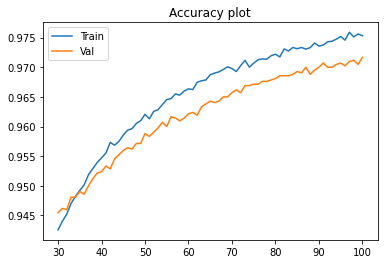

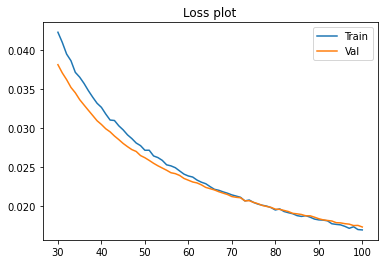

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(range(30, len(acc) + 1), acc[29:])
plt.plot(range(30, len(val_acc) + 1), val_acc[29:])
plt.legend(['Train', 'Val'])
plt.title('Accuracy plot')
plt.show()

plt.figure()

plt.plot(range(30, len(loss) + 1), loss[29:])
plt.plot(range(30, len(val_loss) + 1), val_loss[29:])
plt.legend(['Train', 'Val'])
plt.title('Loss plot')
plt.show()

In [ ]:
print("Evaluation of our model")
print("--------------------------")
model.evaluate(X_test, y_test)

Evaluation of model
--------------------------
57/57 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9861


[0.011120171286165714, 0.9861111044883728]

In [ ]:
# Command used to convert to a portable format which can be used with opencv for inference
!pip install  tf2onnx
!python3 -m tf2onnx.convert --saved-model "weights/model" --output "weights/hog_ann_model.onnx"

     |████████████████████████████████| 435 kB 5.3 MB/s 
     |████████████████████████████████| 12.8 MB 30.2 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-05-01 19:57:22,160 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-05-01 19:57:22,533 - INFO - Signatures found in model: [serving_default].
2022-05-01 19:57:22,533 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-05-01 19:57:22,534 - INFO - Output names: ['dense_4']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-05-01 19:57:22,628 - WARNING - From /usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py:706: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-05-01 19:57:22,660 - INFO - Using ten

In [ ]:
!ls weights

hog_ann_model.onnx  model


In [ ]:
loaded_model = cv.dnn.readNetFromONNX('weights/hog_ann_model.onnx')

Let's check out the model output.

In [ ]:
loaded_model.setInput(X_des[1])

In [ ]:
y_1 = loaded_model.forward()

In [ ]:
print("Probabilities predicted\n", y_1)

Probabilities predicted
 [[7.7384179e-08 9.3133991e-07 2.8268814e-09 4.3566295e-05 8.3142688e-04
  3.8226904e-06 2.4561965e-12 4.0616170e-02 1.6401978e-05 9.5848763e-01]]


In [ ]:
print("The digit predicted is", np.argmax(y_1))

The digit predicted is 9


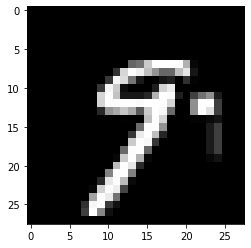

In [ ]:
# Verifying the prediction
plt.imshow(X[1], cmap="gray")